# Time Series for Hamilton Shelter Occupancy

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pathlib import Path
tody = date.today()

In [2]:
# file to load
file_to_load = Path("Resources/Shelter_Occupancy.csv")

# Read the csv into a dataframe
shelter_occupancy = pd.read_csv(file_to_load)

# Display the data
shelter_occupancy.head()

,OBJECTID,MONTH_YEAR,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
0,1,2020/01/31 05:00:00+00,1.14,1.04,0.93,0.68,NaN
1,2,2020/02/28 05:00:00+00,1.11,1.02,0.91,0.60,NaN
2,3,2020/03/31 05:00:00+00,1.08,0.82,0.97,0.52,NaN
3,4,2020/04/30 05:00:00+00,1.39,0.87,0.95,0.70,0.44
4,5,2020/05/31 05:00:00+00,1.14,0.80,0.64,0.46,0.50


In [3]:
# Remove time from date
shelter_occupancy['MONTH_YEAR'] = pd.to_datetime(shelter_occupancy['MONTH_YEAR']).dt.date

# Display the data
shelter_occupancy.head()

,OBJECTID,MONTH_YEAR,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
0,1,2020-01-31,1.14,1.04,0.93,0.68,NaN
1,2,2020-02-28,1.11,1.02,0.91,0.60,NaN
2,3,2020-03-31,1.08,0.82,0.97,0.52,NaN
3,4,2020-04-30,1.39,0.87,0.95,0.70,0.44
4,5,2020-05-31,1.14,0.80,0.64,0.46,0.50


In [4]:
# Format the 'Month_Year' column
shelter_occupancy['MONTH_YEAR'] = pd.to_datetime(shelter_occupancy['MONTH_YEAR'], format='%m/%d/%Y')

# Rename the 'Month_Year' column to 'Date'
shelter_occupancy.rename(columns={'MONTH_YEAR': 'Date'}, inplace=True)

# Set the 'Date' column as the index
shelter_occupancy.set_index('Date', inplace=True)

# Display the data
shelter_occupancy.head()


,OBJECTID,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
Date,,,,,,
2020-01-31,1,1.14,1.04,0.93,0.68,NaN
2020-02-28,2,1.11,1.02,0.91,0.60,NaN
2020-03-31,3,1.08,0.82,0.97,0.52,NaN
2020-04-30,4,1.39,0.87,0.95,0.70,0.44
2020-05-31,5,1.14,0.80,0.64,0.46,0.50


In [5]:
# Remove column
shelter_occupancy = shelter_occupancy.drop(columns=['OBJECTID'])

# Display the data
shelter_occupancy.head()

,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
Date,,,,,
2020-01-31,1.14,1.04,0.93,0.68,NaN
2020-02-28,1.11,1.02,0.91,0.60,NaN
2020-03-31,1.08,0.82,0.97,0.52,NaN
2020-04-30,1.39,0.87,0.95,0.70,0.44
2020-05-31,1.14,0.80,0.64,0.46,0.50


In [6]:
# Drop the null values
shelter_occupancy = shelter_occupancy.dropna()

# Display the data
shelter_occupancy.head()

,PERCENT_MEN,PERCENT_WOMEN,PERCENT_FAMILIES,PERCENT_YOUTH,PERCENT_EMERGENCY
Date,,,,,
2020-04-30,1.39,0.87,0.95,0.70,0.44
2020-05-31,1.14,0.80,0.64,0.46,0.50
2020-06-30,1.07,0.78,1.00,0.51,0.34
2020-07-31,0.91,0.78,1.00,0.42,0.31
2020-08-31,0.90,0.85,1.00,0.29,0.33


In [7]:
# Check data types
shelter_occupancy.dtypes

PERCENT_MEN          float64
PERCENT_WOMEN        float64
PERCENT_FAMILIES     float64
PERCENT_YOUTH        float64
PERCENT_EMERGENCY    float64
dtype: object

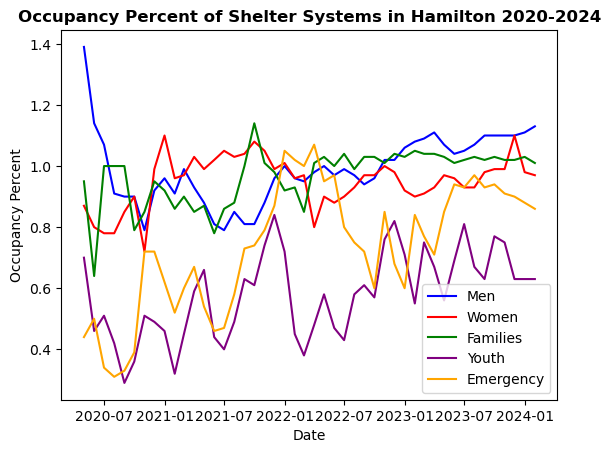

In [8]:
# Lines for plot
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_MEN'], color='blue', label='Men')
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_WOMEN'], color='red', label='Women')
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_FAMILIES'], color='green', label='Families')
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_YOUTH'], color='purple', label='Youth')
plt.plot(shelter_occupancy.index, shelter_occupancy['PERCENT_EMERGENCY'], color='orange', label='Emergency')

# Title of the plot
plt.title('Occupancy Percent of Shelter Systems in Hamilton 2020-2024')
# Bold title
plt.title('Occupancy Percent of Shelter Systems in Hamilton 2020-2024', fontweight='bold')

# Label for x and y axis
plt.xlabel('Date')
plt.ylabel('Occupancy Percent')

# Add Legend
plt.legend(loc='lower right')

# Plot the data
plt.show()


In [9]:
# file to load
file = Path("Resources/Shelter_Beds_Available.csv")

# Read the csv into a dataframe
shelter_beds = pd.read_csv(file)

# Display the data
shelter_beds.head()

,OBJECTID,MONTH_YEAR,MEN_BEDS,WOMEN_BEDS,FAMILY_ROOMS,YOUTH_BEDS,EMERGENCY_HOTEL_OVERFLOW_ROOMS,TOTAL_BEDS,TOTAL_ROOMS
0,1,2020/01/31 05:00:00+00,220,46,20,21,0,287,20
1,2,2020/02/28 05:00:00+00,193,46,20,21,0,260,20
2,3,2020/03/31 05:00:00+00,219,46,20,21,0,286,20
3,4,2020/04/30 05:00:00+00,150,46,20,21,67,217,87
4,5,2020/05/31 05:00:00+00,127,46,20,21,43,194,63


In [10]:
# Remove time from date
shelter_beds['MONTH_YEAR'] = pd.to_datetime(shelter_beds['MONTH_YEAR']).dt.date

# Display the data
shelter_beds.head()

,OBJECTID,MONTH_YEAR,MEN_BEDS,WOMEN_BEDS,FAMILY_ROOMS,YOUTH_BEDS,EMERGENCY_HOTEL_OVERFLOW_ROOMS,TOTAL_BEDS,TOTAL_ROOMS
0,1,2020-01-31,220,46,20,21,0,287,20
1,2,2020-02-28,193,46,20,21,0,260,20
2,3,2020-03-31,219,46,20,21,0,286,20
3,4,2020-04-30,150,46,20,21,67,217,87
4,5,2020-05-31,127,46,20,21,43,194,63


In [11]:
# Format the 'Month_Year' column
shelter_beds['MONTH_YEAR'] = pd.to_datetime(shelter_beds['MONTH_YEAR'], format='%m/%d/%Y')

# Rename the 'Month_Year' column to 'Date'
shelter_beds.rename(columns={'MONTH_YEAR': 'Date'}, inplace=True)

# Set the 'Date' column as the index
shelter_beds.set_index('Date', inplace=True)

# Display the data
shelter_beds.head()

,OBJECTID,MEN_BEDS,WOMEN_BEDS,FAMILY_ROOMS,YOUTH_BEDS,EMERGENCY_HOTEL_OVERFLOW_ROOMS,TOTAL_BEDS,TOTAL_ROOMS
Date,,,,,,,,
2020-01-31,1,220,46,20,21,0,287,20
2020-02-28,2,193,46,20,21,0,260,20
2020-03-31,3,219,46,20,21,0,286,20
2020-04-30,4,150,46,20,21,67,217,87
2020-05-31,5,127,46,20,21,43,194,63


In [12]:
# Remove column
shelter_beds = shelter_beds.drop(columns=['OBJECTID'])

# Display the data
shelter_beds.head()

,MEN_BEDS,WOMEN_BEDS,FAMILY_ROOMS,YOUTH_BEDS,EMERGENCY_HOTEL_OVERFLOW_ROOMS,TOTAL_BEDS,TOTAL_ROOMS
Date,,,,,,,
2020-01-31,220,46,20,21,0,287,20
2020-02-28,193,46,20,21,0,260,20
2020-03-31,219,46,20,21,0,286,20
2020-04-30,150,46,20,21,67,217,87
2020-05-31,127,46,20,21,43,194,63


In [13]:
# Check data types
shelter_occupancy.dtypes

PERCENT_MEN          float64
PERCENT_WOMEN        float64
PERCENT_FAMILIES     float64
PERCENT_YOUTH        float64
PERCENT_EMERGENCY    float64
dtype: object

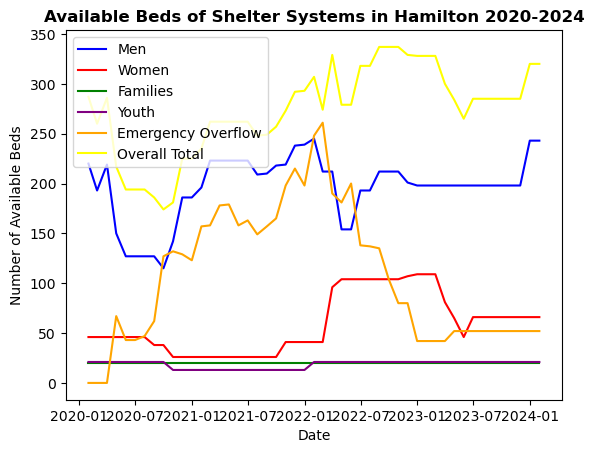

In [14]:
# Lines for plot
plt.plot(shelter_beds.index, shelter_beds['MEN_BEDS'], color='blue', label='Men')
plt.plot(shelter_beds.index, shelter_beds['WOMEN_BEDS'], color='red', label='Women')
plt.plot(shelter_beds.index, shelter_beds['FAMILY_ROOMS'], color='green', label='Families')
plt.plot(shelter_beds.index, shelter_beds['YOUTH_BEDS'], color='purple', label='Youth')
plt.plot(shelter_beds.index, shelter_beds['EMERGENCY_HOTEL_OVERFLOW_ROOMS'], color='orange', label='Emergency Overflow')
plt.plot(shelter_beds.index, shelter_beds['TOTAL_BEDS'], color='yellow', label='Overall Total')

# Title of the plot
plt.title('Available Beds of Shelter Systems in Hamilton 2020-2024')
# Bold title
plt.title('Available Beds of Shelter Systems in Hamilton 2020-2024', fontweight='bold')

# Label for x and y axis
plt.xlabel('Date')
plt.ylabel('Number of Available Beds')

# Add Legend
plt.legend()

# Plot the data
plt.show()

In [15]:
# file to load
file_path = Path("Resources/Shelter Systems.xlsx")

# Read the excel file into a dataframe
shelter_system = pd.read_excel(file_path)

# Display the data
shelter_system.head()

,System,Number of Beds Per System
0,Men,198
1,Women,46
2,Family,80
3,Youth,21
4,Women Overflow,20


In [16]:
# Set system column as index
shelter_system.set_index('System', inplace=True)

# display data
shelter_system.head()

,Number of Beds Per System
System,
Men,198
Women,46
Family,80
Youth,21
Women Overflow,20


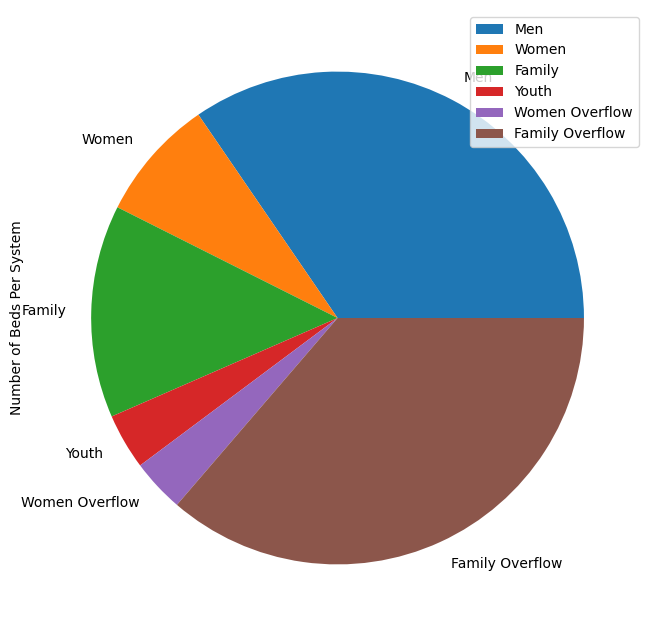

In [17]:
# pie chart
shelter_system.plot(kind='pie', subplots=True, figsize=(8,8))

#show plot
plt.show()


In [18]:
# file to load
load = Path("Resources/Shelter Turnaway.xlsx")

# Read the csv into a dataframe
shelter_turnaway = pd.read_excel(load)

# Display the data
shelter_turnaway.head()

,Reason for Turnaway,Number of Turnaways
0,Court Order,4
1,Decided not to Stay,56
2,Difficult to Serve,31
3,Diversion Successful,328
4,Has Other Housing,139


In [19]:
# Set system column as index
shelter_turnaway.set_index('Reason for Turnaway', inplace=True)

# display data
shelter_turnaway.head()

,Number of Turnaways
Reason for Turnaway,
Court Order,4
Decided not to Stay,56
Difficult to Serve,31
Diversion Successful,328
Has Other Housing,139


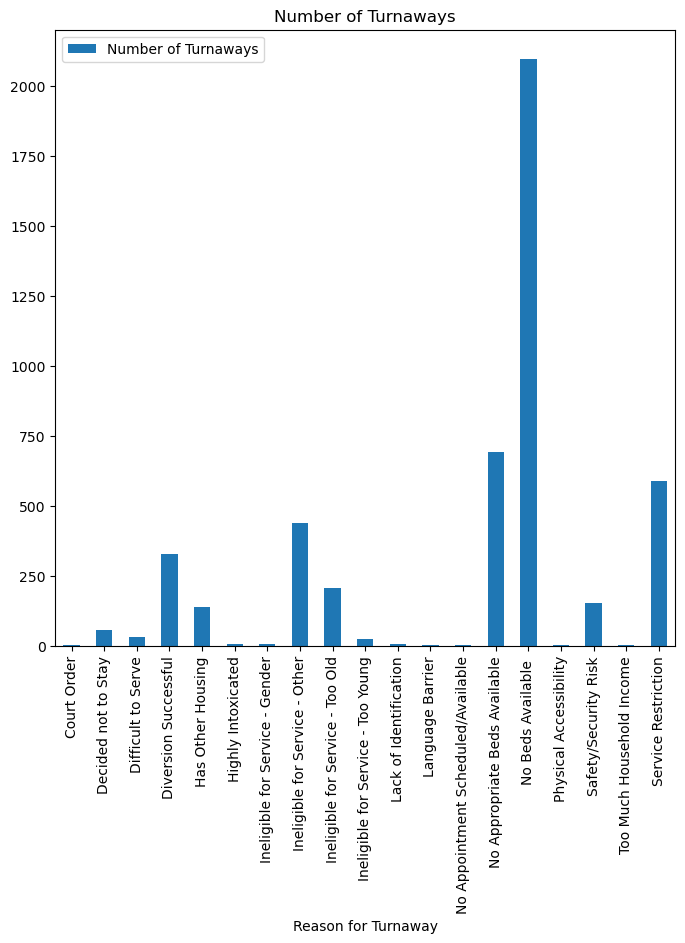

In [23]:
# pie chart
shelter_turnaway.plot(kind='bar', subplots=True, figsize=(8,8))

#show plot
plt.show()